# LMS Exploration | scikit-learn Wine Classifier
---

**[Introduce]**

- 3가지 종류의 와인 분류기 


- 와인분류기는 와인의 각 화학적 성분이 입력되었을 때, 화학적 성분을 토대로 어떤 와인의 Class 에 속하는지 맞추는 분류모델이다.


- Decision Tree, Random Forest, SVM, SGD Classifier, Logistic Regression 의 다양한 모델로 학습시키고, 평가해본다.


**[dataset]**

- scikit-learn이 예제로 제공하는 Toy datasets 중 load_wine dataset 을 활용한다.


- load_wine의 data는 총 173개이고, feature는 13개의 wine 성분값이며, label은 0, 1, 2 로 표현되는 3가지 Class 이다. label은 각각의 다른 type의 wine을 나타낸다.


- load wine의 데이터는 이탈리아의 3명의 다른 재배자로부터 얻은 와인들의 화학적 분석 결과이다.


## 1. 모듈 import

In [1]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline 
import pandas as pd

## 2. 데이터 준비

In [2]:
wine = load_wine()
wine_data = wine.data

## 3. 데이터 이해하기

Feature Data 지정, Label Data 지정, Target Names 출력, 데이터 Describe 하기

In [3]:
print(wine.keys()) #객체가 가진 변수와 메서드 나열 출력
print(wine_data.shape) #배열의 형상정보 출력
wine_data[0] # index가 0인 데이터 출력

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])
(178, 13)


array([1.423e+01, 1.710e+00, 2.430e+00, 1.560e+01, 1.270e+02, 2.800e+00,
       3.060e+00, 2.800e-01, 2.290e+00, 5.640e+00, 1.040e+00, 3.920e+00,
       1.065e+03])

In [4]:
wine.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

- wine의 data는 178개의 데이터가 각각 13개의 정보를 담고 있음. 
- wine의 화학적 성분 분석데이터로, 각 숫자는 13개 feature의 성분값을 의미함.

In [5]:
wine_label = wine.target
print(wine_label.shape)
wine_label

(178,)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [6]:
wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

- target 데이터는 총 178개가 있고, 'class_0'은 0, 'class_1'은 1, 'class_2'는 2 로 나타남.
- 와인의 종류에 따라 0, 1, 2 로 나뉨.

In [7]:
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

* pandas를 이용해 wine dataset을 가독성 있는 표로 나타내보자

In [8]:
wine_df = pd.DataFrame(data=wine_data, columns=wine.feature_names)
wine_df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [9]:
wine_df["label"] = wine.target
wine_df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,label
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


## 4. train, test 데이터 분리


In [10]:
X_train, X_test, y_train, y_test = train_test_split(wine_data, 
                                                    wine_label, 
                                                    test_size=0.2, 
                                                    random_state=7)

print('X_train 개수: ', len(X_train), ', X_test 개수: ', len(X_test))

X_train 개수:  142 , X_test 개수:  36


## 5. 다양한 모델로 학습시켜보기 

Decision Tree, Random Forest, SVM, SGD Classifier, Logistic Regression

### 5-1. Decision Tree

In [11]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier(random_state=32)
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=32)

### 5-2. Random Forest

In [12]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(random_state=32)
random_forest.fit(X_train, y_train)

RandomForestClassifier(random_state=32)

### 5-3. SVM

In [21]:
from sklearn import svm

svm_model = svm.SVC(random_state=32, kernel='linear' )
svm_model.fit(X_train, y_train)

SVC(kernel='linear', random_state=32)

### 5-4. SGD Classifier

In [29]:
from sklearn.linear_model import SGDClassifier

sgd_model = SGDClassifier(loss="modified_huber", penalty='l2')
sgd_model.fit(X_train, y_train)

SGDClassifier(loss='modified_huber')

### 5-5. Logistic Regression

In [15]:
from sklearn.linear_model import LogisticRegression

logistic_model = LogisticRegression(random_state=32, max_iter = 50000, solver='lbfgs')
logistic_model.fit(X_train, y_train)

LogisticRegression(max_iter=50000, random_state=32)

## 6. 모델 평가해 보기

- 모델의 성능을 평가하는 지표로 무엇이 적절할까?
- sklearn.metrics에서 제공하는 평가지표중 적절한 것은 선택하고, 선택한 이유를 설명하라

---

**[Machine Learning Model]**
* **Decision Tree (DTs)** 는 일련의 분류 규칙을 통해 데이터를 분류, 회귀하는 지도학습 모델 중 하나로, 결과 모델이 Tree 구조를 가지고 있다. 결정트리는 특정 기준에 따라 데이터를 구분하여 한번의 분기 때마다 변수 영역을 두 개로 구분하는데, 이때 결정트리는 불순도를 최소화하는 방향으로 학습을 진행한다.
* **Random Forest** 는 분류, 회귀분석 등에 사용되는 앙상블 학습 방법의 일종으로, 훈련 과정에서 구성한 다수의 결정 트리로부터 부류(분류) 또는 평균 예측치(회귀 분석)을 출력함으로써 동작한다. 랜덤 포레스트는 랜덤성에 의해 트리들이 서로 조금씩 다른 특성을 갖으며, 결과적으로 일반화 성능을 향상시킨다. 
* **Support Vector Machine (SVM)** 은 Non-linear problem 을 Linear problem 으로 바꾸어, 분류와 회귀분석에 사용되는 지도학습 모델이다. SVM 의 주요 목적은 두 클래스 사이의 Margin을 최대화하는 최적의 분리경계 'Hyperplane(초평면)'을 찾는 것이다. 
* **Stochastic Gradient Descent(SGD)** 는 Batch(단일 반복에서 기울기를 계산하는 데 사용하는 data의 총 개수)의 크기가 1 인 경사하강법 알고리즘이다. Mini-Batch를 사용하여 다소 부정확할 수는 있지만, BGD(Batch Gradient Descent)에 비해서 계산속도가 훨씬 빠르다. 
* **Logistic Regression** 는 회귀를 사용하여 데이터가 어떤 범수에 속할 확률을 0에서 1 사이의 값으로 예측하고 그 확률에 따라 가능성이 더 높은 범주에 속하는 것으로 '분류'해주는 지도학습 알고리즘이다. 로지스틱 회귀는 데이터가 어떤 범주에 속할 확률을 0과 1사이의 값으로 예측하는 이진분류가 기본이고, OvR 같은 방식을 사용하면 멀티 클래스 분류도 가능하다.

### 6-1. Classification Report

In [30]:
#- Decision Tree

y_pred_DT = decision_tree.predict(X_test)
accuracy_DT = accuracy_score(y_test, y_pred_DT)

print(f'\n[Decision Tree Classifier]\n')
print(classification_report(y_test, y_pred_DT))

#- Random Forest

y_pred_RF = random_forest.predict(X_test)
accuracy_RF = accuracy_score(y_test, y_pred_RF)

print('\n[Random Forest Classifier]\n')
print(classification_report(y_test, y_pred_RF))

#- SVM

y_pred_SVM = svm_model.predict(X_test)
accuracy_SVM = accuracy_score(y_test, y_pred_SVM)

print('\n[SVM Classifier]\n')
print(classification_report(y_test, y_pred_SVM))

#- SGD

y_pred_SGD = sgd_model.predict(X_test)
accuracy_SGD = accuracy_score(y_test, y_pred_SGD)

print('\n[SGD Classifier]\n')
print(classification_report(y_test, y_pred_SGD))
from sklearn.metrics import f1_score
import numpy as np
print(f1_score(y_test, y_pred_SGD, average='weighted', labels=np.unique(y_pred_SGD)))
#- Logistic Regression

y_pred_LR = logistic_model.predict(X_test)
accuracy_LR = accuracy_score(y_test, y_pred_LR)

print('\n[Logistic Regression Classifier]\n')
print(classification_report(y_test, y_pred_LR))


[Decision Tree Classifier]

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       0.89      1.00      0.94        17
           2       1.00      0.83      0.91        12

    accuracy                           0.94        36
   macro avg       0.96      0.94      0.95        36
weighted avg       0.95      0.94      0.94        36


[Random Forest Classifier]

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00        12

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36


[SVM Classifier]

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       0.94      0.94      0.94        1

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### 6-2. Visualize Confusion Matrix

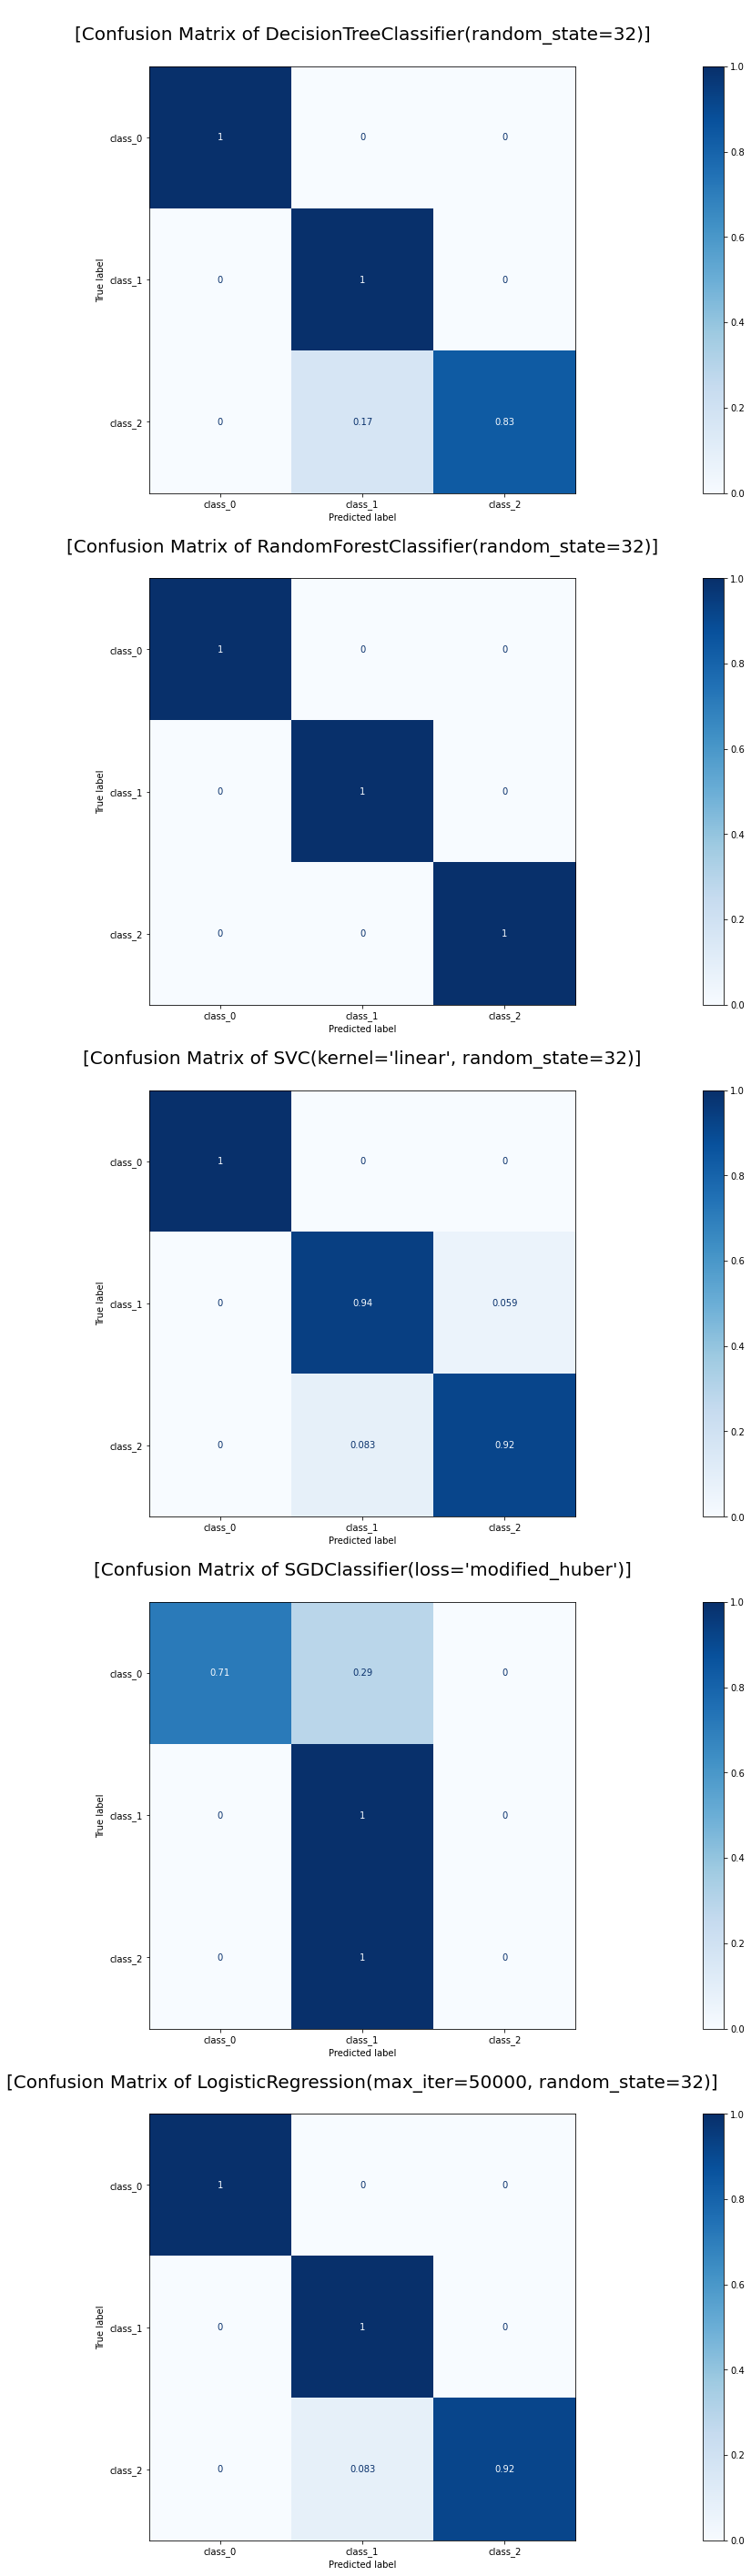

In [31]:
#- Confusion Matrix 시각화 함수
from sklearn.metrics import plot_confusion_matrix


def Visualize_Confusion_Matrix(model, X_test, y_test, label):
    #fig, ax = plt.subplots(figsize=(50, 50))
    plot = plot_confusion_matrix(model, X_test, y_test, display_labels=label, cmap=plt.cm.Blues, normalize='true', ax=ax)
    plot.ax_.set_title(f'\n[Confusion Matrix of {model}]\n', fontsize=20) 
    
model = [decision_tree, random_forest, svm_model, sgd_model, logistic_model]

fig = plt.figure(figsize=(50,50))
for i in range (len(model)):
    ax = fig.add_subplot(len(model),1,i+1)
    Visualize_Confusion_Matrix(model[i], X_test, y_test, wine.target_names )

### 6-3. Compare Accuracy

각 모델의 test accuracy를 비교하여 가장 성능이 좋은 모델을 선정한다.

In [18]:
import operator

dict = {'Decision Tree':accuracy_DT, 'Random Forest':accuracy_RF, 'SVM':accuracy_SVM, 'SGD Classifier':accuracy_SGD, 'Logistic Regression':accuracy_LR}
sdict = sorted(dict.items(), key=operator.itemgetter(1), reverse=True)

print('\n[정확도가 높은 모델 순서]\n')
for i in range(len(sdict)):
    print(f'{i+1}.{sdict[i][0]}, 정확도 : {sdict[i][1]} ')
    
print(f'\n\n가장 정확도가 높은 모델은 {sdict[0][0]}이고, 정확도는 {sdict[0][1]}이며, \n가장 정확도가 낮은 모델은 {sdict[len(sdict)-1][0]}이고, 정확도는 {sdict[len(sdict)-1][1]}입니다\n')


[정확도가 높은 모델 순서]

1.Random Forest, 정확도 : 1.0 
2.Logistic Regression, 정확도 : 0.9722222222222222 
3.Decision Tree, 정확도 : 0.9444444444444444 
4.SVM, 정확도 : 0.9444444444444444 
5.SGD Classifier, 정확도 : 0.5833333333333334 


가장 정확도가 높은 모델은 Random Forest이고, 정확도는 1.0이며, 
가장 정확도가 낮은 모델은 SGD Classifier이고, 정확도는 0.5833333333333334입니다



## 7. 프로젝트 정리 | Summary
---

### 7-1. 성능평가

**Best Machine Learning Model** : Random Forest Classification Model


**test_accuracy** : 1.0

Confusion Matrix, Precision, Recall 등 전반적인 성능지표를 살펴볼때 Decision Tree 모델의 과적합(overfitting) 문제를 보완한 Random Forest 모델의 성능이 가장 뛰어나다. 이때 Logistic Regression 모델의 성능은 Random Forest와 견줄만하다.  

SVM, SGD 모델에 아무런 인자를 설정하지 않았을 때, Confusion Matrix를 살펴보면, Class 2를 Class 1으로 잘못 예측한 비율이 두 모델 모두 90 % 이상이었다. 또한 Class 2 대한 precision, recall, f1-score 값은 SVM 모델은 30% 아래이며, SGD 모델은 0%에 수렴했다. 원인분석 결과, SVM(support vector machine)과 SGD(Stochastic gradient descent)는 '이진 선형 분류 모델'으로서 카테고리가 3개인 wine dataset 분류에는 적합하지 않다고 추측했다. 그러나 SVM의 경우 'kernel'인자를 default 값인 'rbf' 에서 'linear'로 변경한 결과, 모델의 성능이 눈에 띄게 증진되었다. 반면 SGD 모델의 경우, 'loss'와 'penalty' 인자의 값을 변경해보았지만, 여전히 성능이 좋아지지 않았다. 


결과적으로, wine Classification 문제 해결에는 Random Forest Classification Model 또는 Logistic Regression Model이 적합하며, SGD 모델은 적합하지 않다. 
 

### 7-2. 자기평가

scikit-learn에서 제공하는 digits_load dataset은 모델마다 성능의 차이는 조금씩 있었지만, 전반적으로 모든 모델의 학습이 잘 나왔다. 그런데 wine_load dataset은 아무런 인자를 설정하지 않은 경우, SVM 과 SGD 모델의 성능은 처참했다. 이에 대한 원인 분석을 위해서 각 데이터셋과 각 모델의 특성을 조사해보고 비교해보았지만, 단기간에 각 머신러닝 모델과 그에 맞는 데이터 유형을 이해하기란 쉽지 않았다. 
구글링을 통해 여러 글을 읽으며 노력했지만, SVM 모델의 'kernal' 인자의 default 값인 'rbf' 함수를 이해하는 것조차 쉬운 일이 아니었다.
여전히 SVM, SGD 모델에 대한 의문이 남아있다. 이번 프로젝트를 통해 효과적인 머신러닝 학습을 위해서는 데이터셋과 학습모델에 대한 깊은 이해가 필요하며, 이를 바탕으로 적절한 매칭이 이뤄져야 한다고 느꼈다. 

머신러닝에 있어서 가장 쉬운 것이 '학습'이고 '데이터 전처리'와 '성능평가'가 어렵고 중요한 부분이라는 생각이 들었다. scikit-learn 에서 제공하는 양질의 데이터를 사용했기 때문에 데이터 전처리의 수고는 아낄 수 있었지만, dataset에 대해 모델의 평가지표를 선택하는 것이 어려웠다. 모델의 평가지표를 선택함에 있어서 '정확도의 함수'에 빠지지 않기 위해서는, dataset의 전반적인 특성을 고려하여 precision, recall 등의 다양한 평가지표를 고려해야 한다는 것을 배웠다. 앞으로 다양한 모델에 대한 이해가 뒷받침 된다면 성능평가의 지표를 선택하는 것도 한결 수월해질 것이라 기대한다. 